In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import sys
import matplotlib as mpl
from pathlib import Path
import matplotlib.dates as mdates
import psyplot.project as psy
import six

In [2]:
# Read in nc file and file grid information (only if nc file is missing the information!)

# Function for encoding
def add_encoding(obj):
    obj.encoding['coordinates'] = 'clat clon' 

grid_ds = psy.open_dataset('../data/ICON-1E_DOM01.nc')
icon_ds = psy.open_dataset('../data/lfff01000000.nc').squeeze()
data = icon_ds.rename({"ncells":"cell"}).merge(grid_ds)
for k, v in six.iteritems(data.data_vars):
    add_encoding(v) 

In [3]:
# Read in nc file that contains grid information
input_file = '../data/my_exp1_atm_3d_ml_20180921T000000Z.nc'
data = psy.open_dataset(input_file)

In [4]:
var_name = 'u' # name of variable
var_field = getattr(data,var_name)
var_dims = var_field.dims
values = var_field.values
if 'time' in var_dims:
    time = 0
    var = values[time,:,:]
else:
    var = values
height_ind = [i for i, s in enumerate(var_field.dims) if 'height' in s]
height_dim = var_field.dims[height_ind[0]]
height = getattr(data,height_dim).values[:]

In [5]:
# Get mean over whole map
var_mean = var.mean(axis=1)

In [6]:
# Get values of grid cell closest to coordinate
# E.g. Zürich:
lon = 8.54
lat = 47.38
lats = np.rad2deg(data.clat.values[:])
lons = np.rad2deg(data.clon.values[:])
def ind_from_latlon(lats, lons, lat, lon, verbose=False):                                                                    
    """Find the nearest neighbouring index to given location.                                                                
    Args:                                                                                                                    
        lats (2d array):            Latitude grid                                                                            
        lons (2d array):            Longitude grid                                                                           
        lat (float):                Latitude of location                                                                     
        lon (float):                Longitude of location                                                                    
        verbose (bool, optional):   Print information. Defaults to False.                                                    
    Returns:                                                                                                                 
        int     Index of nearest grid point.                                                                                 
    """                                                                                                                      
    dist = [                                                                                                                 
        np.sqrt((lats[i] - lat) ** 2 + (lons[i] - lon) ** 2) for i in range(len(lats))                                       
    ]                                                                                                                        
    ind = np.where(dist == np.min(dist))[0][0]                                                                               
    if verbose:                                                                                                              
        print(f"Closest ind: {ind}")                                                                                         
        print(f" Given lat: {lat:.3f} vs found lat: {lats[ind]:.3f}")                                                        
        print(f" Given lon: {lon:.3f} vs found lon: {lons[ind]:.3f}")                                                        
    return ind 

ind = ind_from_latlon(lats,lons,lat,lon,verbose=True)
var_coord = var[:,ind]

Closest ind: 3352
 Given lat: 47.380 vs found lat: 47.372
 Given lon: 8.540 vs found lon: 8.527


(0.0, 70.0)

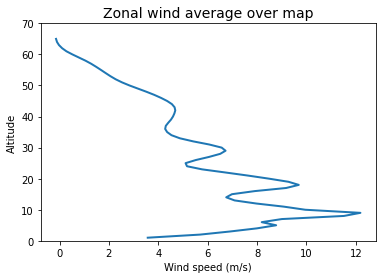

In [7]:
# Create plot of var_mean
f, axes = plt.subplots(1,1)                                                                                              
ax = axes                                                                                                                
h = ax.plot(var_mean, height, lw=2)
ax.set_xlabel('Wind speed (m/s)')
ax.set_ylabel('Altitude')
ax.set_title('Zonal wind average over map', fontsize=14)
plt.ylim([0,70])

(0.0, 70.0)

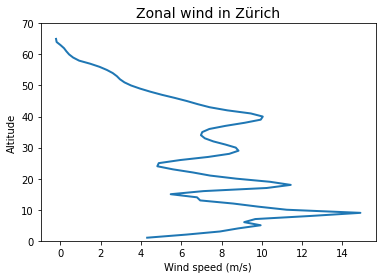

In [8]:
# Create plot of var_coord
f, axes = plt.subplots(1,1)                                                                                              
ax = axes                                                                                                                
h = ax.plot(var_coord, height, lw=2)
ax.set_xlabel('Wind speed (m/s)')
ax.set_ylabel('Altitude')
ax.set_title('Zonal wind in Zürich', fontsize=14)
plt.ylim([0,70])